In [25]:
import torch
from torch import optim, nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print(image.size())
print(label)


Extracting data/cifar-10-python.tar.gz to data/
torch.Size([3, 32, 32])
6


In [5]:
image.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

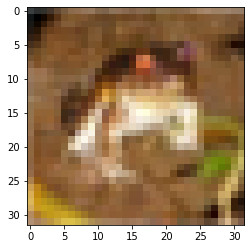

In [12]:
plt.imshow(image.permute(1, 2, 0).numpy());

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [14]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                            download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                          shuffle=False)

Files already downloaded and verified


In [36]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [37]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

Net(
  (fc1): Linear(in_features=3072, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.0)

In [39]:
num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

print('Training is finished!')

Epoch [1/5]. Step [1/782]. Loss: 0.036
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.035
Epoch [2/5]. Step [1/782]. Loss: 0.033
Epoch [2/5]. Step [301/782]. Loss: 0.032
Epoch [2/5]. Step [601/782]. Loss: 0.031
Epoch [3/5]. Step [1/782]. Loss: 0.031
Epoch [3/5]. Step [301/782]. Loss: 0.030
Epoch [3/5]. Step [601/782]. Loss: 0.030
Epoch [4/5]. Step [1/782]. Loss: 0.032
Epoch [4/5]. Step [301/782]. Loss: 0.029
Epoch [4/5]. Step [601/782]. Loss: 0.029
Epoch [5/5]. Step [1/782]. Loss: 0.034
Epoch [5/5]. Step [301/782]. Loss: 0.028
Epoch [5/5]. Step [601/782]. Loss: 0.028
Training is finished!


In [40]:
_, predicted = torch.max(outputs, 1)

In [41]:
print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  deer deer truck deer frog horse deer frog bird car cat ship ship car frog plane


In [42]:
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['deer' 'frog' 'car' 'deer' 'frog' 'horse' 'frog' 'dog' 'dog' 'car' 'car'
 'car' 'plane' 'car' 'bird' 'ship']
['deer' 'deer' 'truck' 'deer' 'frog' 'horse' 'deer' 'frog' 'bird' 'car'
 'cat' 'ship' 'ship' 'car' 'frog' 'plane']
Accuracy is 0.375


### Оптимизация

In [47]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 8 * hidden_dim)
        self.fc3 = nn.Linear(8 * hidden_dim, 8 * hidden_dim)
        self.fc4 = nn.Linear(8 * hidden_dim, 8 * hidden_dim)
        self.fc5 = nn.Linear(8 * hidden_dim, 2 * hidden_dim)
        self.fc6 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc7 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.leaky_relu(x)
        x = self.fc5(x)
        x = F.leaky_relu(x)
        x = self.fc6(x)
        x = F.leaky_relu(x)
        x = self.fc7(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.0)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

_, predicted = torch.max(outputs, 1)

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

Epoch [1/10]. Step [1/782]. Loss: 0.036
Epoch [1/10]. Step [301/782]. Loss: 0.036
Epoch [1/10]. Step [601/782]. Loss: 0.036
Epoch [2/10]. Step [1/782]. Loss: 0.036
Epoch [2/10]. Step [301/782]. Loss: 0.036
Epoch [2/10]. Step [601/782]. Loss: 0.036
Epoch [3/10]. Step [1/782]. Loss: 0.036
Epoch [3/10]. Step [301/782]. Loss: 0.036
Epoch [3/10]. Step [601/782]. Loss: 0.034
Epoch [4/10]. Step [1/782]. Loss: 0.034
Epoch [4/10]. Step [301/782]. Loss: 0.032
Epoch [4/10]. Step [601/782]. Loss: 0.032
Epoch [5/10]. Step [1/782]. Loss: 0.030
Epoch [5/10]. Step [301/782]. Loss: 0.031
Epoch [5/10]. Step [601/782]. Loss: 0.030
Epoch [6/10]. Step [1/782]. Loss: 0.032
Epoch [6/10]. Step [301/782]. Loss: 0.030
Epoch [6/10]. Step [601/782]. Loss: 0.030
Epoch [7/10]. Step [1/782]. Loss: 0.031
Epoch [7/10]. Step [301/782]. Loss: 0.029
Epoch [7/10]. Step [601/782]. Loss: 0.029
Epoch [8/10]. Step [1/782]. Loss: 0.027
Epoch [8/10]. Step [301/782]. Loss: 0.028
Epoch [8/10]. Step [601/782]. Loss: 0.028
Epoch [9

Результат: Accuracy is 0.3125 при незначительном увеличении слоёв, нейронов и эпох.

In [48]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x)
        x = self.fc2(x)
        x = F.leaky_relu(x)
        x = self.fc3(x)
        x = F.leaky_relu(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.0)

num_epochs = 100

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

_, predicted = torch.max(outputs, 1)

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

Epoch [1/100]. Step [1/782]. Loss: 0.036
Epoch [1/100]. Step [301/782]. Loss: 0.035
Epoch [1/100]. Step [601/782]. Loss: 0.032
Epoch [2/100]. Step [1/782]. Loss: 0.032
Epoch [2/100]. Step [301/782]. Loss: 0.030
Epoch [2/100]. Step [601/782]. Loss: 0.030
Epoch [3/100]. Step [1/782]. Loss: 0.029
Epoch [3/100]. Step [301/782]. Loss: 0.029
Epoch [3/100]. Step [601/782]. Loss: 0.028
Epoch [4/100]. Step [1/782]. Loss: 0.026
Epoch [4/100]. Step [301/782]. Loss: 0.027
Epoch [4/100]. Step [601/782]. Loss: 0.027
Epoch [5/100]. Step [1/782]. Loss: 0.026
Epoch [5/100]. Step [301/782]. Loss: 0.026
Epoch [5/100]. Step [601/782]. Loss: 0.026
Epoch [6/100]. Step [1/782]. Loss: 0.024
Epoch [6/100]. Step [301/782]. Loss: 0.025
Epoch [6/100]. Step [601/782]. Loss: 0.025
Epoch [7/100]. Step [1/782]. Loss: 0.028
Epoch [7/100]. Step [301/782]. Loss: 0.025
Epoch [7/100]. Step [601/782]. Loss: 0.025
Epoch [8/100]. Step [1/782]. Loss: 0.022
Epoch [8/100]. Step [301/782]. Loss: 0.024
Epoch [8/100]. Step [601/78

Epoch [64/100]. Step [301/782]. Loss: 0.010
Epoch [64/100]. Step [601/782]. Loss: 0.010
Epoch [65/100]. Step [1/782]. Loss: 0.020
Epoch [65/100]. Step [301/782]. Loss: 0.009
Epoch [65/100]. Step [601/782]. Loss: 0.010
Epoch [66/100]. Step [1/782]. Loss: 0.012
Epoch [66/100]. Step [301/782]. Loss: 0.009
Epoch [66/100]. Step [601/782]. Loss: 0.010
Epoch [67/100]. Step [1/782]. Loss: 0.012
Epoch [67/100]. Step [301/782]. Loss: 0.009
Epoch [67/100]. Step [601/782]. Loss: 0.009
Epoch [68/100]. Step [1/782]. Loss: 0.016
Epoch [68/100]. Step [301/782]. Loss: 0.009
Epoch [68/100]. Step [601/782]. Loss: 0.009
Epoch [69/100]. Step [1/782]. Loss: 0.009
Epoch [69/100]. Step [301/782]. Loss: 0.009
Epoch [69/100]. Step [601/782]. Loss: 0.009
Epoch [70/100]. Step [1/782]. Loss: 0.023
Epoch [70/100]. Step [301/782]. Loss: 0.009
Epoch [70/100]. Step [601/782]. Loss: 0.009
Epoch [71/100]. Step [1/782]. Loss: 0.013
Epoch [71/100]. Step [301/782]. Loss: 0.008
Epoch [71/100]. Step [601/782]. Loss: 0.008
Ep

Результат: Accuracy is 0.9375 при значительном увеличении количества эпох.

In [52]:
class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 4 * hidden_dim)
        self.fc2 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc3 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        x = self.fc4(x)
        return x
    
    def predict(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.sigmoid(x)
        x = self.fc4(x)
        x = F.softmax(x)
        return x


net = Net(3072, 100, 10)
net.train()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.0)

num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    running_items = 0.0


    for i, data in enumerate(train_loader):
        inputs, labels = data[0], data[1]

         # Обнуляем градиент
        optimizer.zero_grad()
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        running_items += len(labels)
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                  f'Step [{i + 1}/{len(train_loader)}]. ' \
                  f'Loss: {running_loss / running_items:.3f}')
            running_loss, running_items = 0.0, 0.0

_, predicted = torch.max(outputs, 1)

gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

Epoch [1/5]. Step [1/782]. Loss: 0.037
Epoch [1/5]. Step [301/782]. Loss: 0.036
Epoch [1/5]. Step [601/782]. Loss: 0.036
Epoch [2/5]. Step [1/782]. Loss: 0.036
Epoch [2/5]. Step [301/782]. Loss: 0.036
Epoch [2/5]. Step [601/782]. Loss: 0.036
Epoch [3/5]. Step [1/782]. Loss: 0.036
Epoch [3/5]. Step [301/782]. Loss: 0.036
Epoch [3/5]. Step [601/782]. Loss: 0.036
Epoch [4/5]. Step [1/782]. Loss: 0.036
Epoch [4/5]. Step [301/782]. Loss: 0.036
Epoch [4/5]. Step [601/782]. Loss: 0.036
Epoch [5/5]. Step [1/782]. Loss: 0.036
Epoch [5/5]. Step [301/782]. Loss: 0.036
Epoch [5/5]. Step [601/782]. Loss: 0.036
Accuracy is 0.0


In [53]:
predicted

tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Результат: сигмоида не подошла.

#### Вывод: Наибольшее повышение Accuracy дало значительное увеличение эпох. При num_epochs = 100, Accuracy = 0.9375.